In [1]:
from typing import Tuple, Dict, List
import gym

from ray.rllib.env.multi_agent_env import MultiAgentEnv

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, clear_output
import numpy as np

from IPython.display import display, HTML

from gym_maze.envs import MazeEnv2, Adversary, AdvPro, AdvPro2, PAIRED

In [3]:
def run_one_episode_adv(env):
    '''Given a gym environment (env) it computer one episode and return cumulative reward.
    Used to check if our gym environments work'''
    
    env.reset()
    sum_reward = 0
    
    steps = []
    frames = []
    
    steps.append(env.state.copy())


    while not env.done:
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        print(state)
        steps.append(env.state.copy())
        sum_reward += reward
        print(info)
        
    return env

In [4]:
adversary = Adversary(n_clutter=2, size=8)
adversary = run_one_episode_adv(adversary)
protagonist = MazeEnv2(adversary.state['image'])
antagonist = MazeEnv2(adversary.state['image'])
adversary = Adversary(n_clutter=2, size=8)

{'image': array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]]), 'time_step': [0]}
{'ready': 'no'}
{'image': array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]]), 'time_step': [1]}
{'ready': 'no'}
{'image': array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0

In [5]:
env = AdvPro2(adversary, protagonist, save=True, file_name='mazes_advpro_10_8/')

In [6]:
action = {0: env.action_space[0].sample(), 1: 0}
state, reward, done, info = env.step(action)
state, reward, done, info

({0: {'image': array([[0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 3., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0.]]),
   'time_step': [0]}},
 {0: 0},
 {0: False, '__all__': False},
 {0: {'ready': 'no'}})

In [7]:
def run_one_episode(env, verbose=False):
    '''Given a gym environment (env) it computer one episode and return cumulative reward.
    Used to check if our gym environments work'''
    env.reset()
    sum_reward_0 = 0
    sum_reward_1 = 0
    states0 = []
    states1 = []
    
    action = {0: env.action_space[0].sample(), 1: env.action_space[1].sample()}
    if verbose:
        print("action:", action)
    state, reward, done, info = env.step(action)
    try:
        sum_reward_0 += reward[0]
        print(info)
        states0.append(state[0].copy())
    except:
        pass
    try: 
        sum_reward_1 += reward[1]
        states1.append(state[1].copy())
    except:
        pass

    while not done["__all__"]:
        action = {0: env.action_space[0].sample(), 1: env.action_space[1].sample()}
        if verbose:
            print("action:", action)
        state, reward, done, info = env.step(action)
        try:
            sum_reward_0 += reward[0]
            print(info)
            states0.append(state[0].copy())
        except:
            pass
        try: 
            sum_reward_1 += reward[1]
            states1.append(state[1].copy())
        except:
            pass
        

    return sum_reward_0, sum_reward_1, states0, states1

sum_reward_0, sum_reward_1, states0, states1 = run_one_episode(env)

{0: {'ready': 'no'}}
{0: {'ready': 'no'}}
{0: {'ready': 'no'}}
{0: {'ready': 'yes'}}
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPISODE DONE!!!
EPI

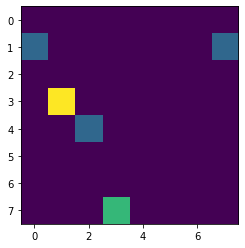

In [44]:
plt.imshow(states0[0]["image"])

In [21]:
env.action_space

{0: Discrete(64), 1: Discrete(4)}

In [22]:
env.observation_space

{0: Dict(image:Box(0.0, 3.0, (8, 8), float16), time_step:Box(0, 4, (1,), uint8)),
 1: Box(0.0, 3.0, (8, 8), float32)}

# PAIRED --> independent training

In [4]:
adversary = Adversary(n_clutter=2, size=4)
adversary = run_one_episode_adv(adversary)
protagonist = MazeEnv2(adversary.state['image'])
antagonist = MazeEnv2(adversary.state['image'])
adversary = Adversary(n_clutter=2, size=4)

{'image': array([[0., 0., 3., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]), 'time_step': [0]}
{'ready': 'no'}
{'image': array([[0., 0., 3., 0.],
       [0., 2., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]), 'time_step': [1]}
{'ready': 'no'}
{'image': array([[0., 0., 3., 0.],
       [0., 2., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]]), 'time_step': [2]}
{'ready': 'no'}
{'image': array([[0., 0., 3., 0.],
       [0., 2., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.]]), 'time_step': [3]}
{'ready': 'yes'}
{'image': array([[0., 0., 3., 0.],
       [0., 2., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.]]), 'time_step': [3]}
{'ready': 'other'}


In [5]:
env = PAIRED(adversary, protagonist, antagonist, file_name = 'trial', save = True)

In [6]:
env.reset()

{0: {'image': array([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
  'time_step': [0]},
 1: array([[0., 0., 3., 0.],
        [0., 2., 0., 0.],
        [0., 0., 1., 1.],
        [0., 0., 0., 0.]]),
 2: array([[0., 0., 3., 0.],
        [0., 2., 0., 0.],
        [0., 0., 1., 1.],
        [0., 0., 0., 0.]])}

In [16]:
action = {0: env.action_space[0].sample(), 1: 3, 2: 3}
state, reward, done, info = env.step(action)
state, reward, done, info, env.pro_finished, env.ant_finished

EPISODE DONE!!!


({0: {'image': array([[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 3., 0.],
          [2., 0., 0., 1.]]),
   'time_step': [3]}},
 {0: 1.96},
 {0: True, '__all__': True},
 {0: {'ready': 'other'}},
 True,
 True)

In [19]:
import pickle
import os
with open('trial1.pkl', "rb") as f:
    maze = pickle.load(f)

In [21]:
maze

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 3., 0.],
        [2., 0., 0., 1.]]),
 0.98,
 0.98,
 1.96,
 0.98,
 0.98,
 1.96,
 0.98,
 0.98,
 1.96]